---

<h3><center>E7 -  Introduction to Programming for Scientists and Engineers</center></h3>

<h2><center>Discussion session #04 <br></center></h2>

---

# [Conway's Game of Life](https://playgameoflife.com/)

In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [40]:
WIDTH = 8
HEIGHT = 8
NUMSTEPS = 2

In [41]:
state = np.empty((HEIGHT,WIDTH,NUMSTEPS))

# traveller
state[:,:,0] = np.zeros((HEIGHT,WIDTH))
state[[2,3],[3,4],0] = 1
state[4,2:5,0] = 1

# # random
# state[:,:,0] = np.random.binomial(n=1,p=0.5,size=(HEIGHT,WIDTH))
# state[[0,-1],:,0] = 0
# state[:,[0,-1],0] = 0

In [42]:
for k in range(1,NUMSTEPS):

    state[:,:,k] = state[:,:,k-1].copy()

    for row in range(1,HEIGHT-1):
        for col in range(1,WIDTH-1):

            square = state[row-1:row+2 , col-1:col+2 , k-1]

            num_neighbors = np.sum(square)-square[1,1]
            
            if square[1,1]==1:
                if num_neighbors<=1:
                    state[row,col,k] = 0
                elif num_neighbors>=4:
                    state[row,col,k] = 0
            else:
                if num_neighbors==3:
                    state[row,col,k] = 1

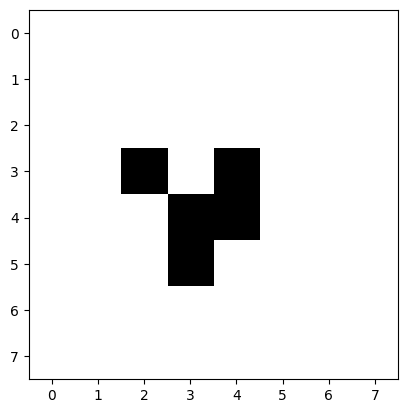

In [47]:
plt.ion()
fig, ax = plt.subplots()
ax.imshow(state[:,:,1],cmap='binary');


# Animation

In [32]:
from matplotlib.animation import FuncAnimation
plt.ioff()
fig, ax = plt.subplots()
grid = ax.imshow(state[:,:,0],cmap='binary')

def update(frame):
    grid.set_array(state[:,:,frame])

anim = FuncAnimation(fig=fig, 
                     func=update, 
                     frames=NUMSTEPS, 
                     interval=200 )

from IPython.display import HTML
HTML(anim.to_jshtml())